In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm
from pathlib import Path
path_noto = Path('../fonts/NotoSansCJKkr-Regular.otf')

from matplotlib import font_manager
# font_manager.fontManager.addfont(path_noto)
plt.rc('font', family='Malgun Gothic')

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
colors = sns.color_palette('pastel')[0:7]


In [25]:
df = pd.read_csv("./population.csv")
df.drop(columns=["Country Code", "Indicator Name", "Indicator Code"], inplace=True)
year_sum = df.sum().reset_index()

In [27]:
year_sum.columns = ['Year', 'Total']
year_sum.drop([0], inplace=True)
year_sum

,Year,Total
1,1960,30945737153.0
2,1961,31370287684.0
3,1962,31942864829.0
4,1963,32650535394.0
5,1964,33364107260.0
...,...,...
58,2017,81638668382.0
59,2018,82637425136.0
60,2019,83612562141.0
61,2020,84561054946.0


In [91]:
trans = df.T
trans.columns = trans.iloc[0, :]
# trans.drop([1], inplace=True)
trans = trans.iloc[1:, :]
trans = trans.astype(float)
trans.index = trans.index.astype(float)

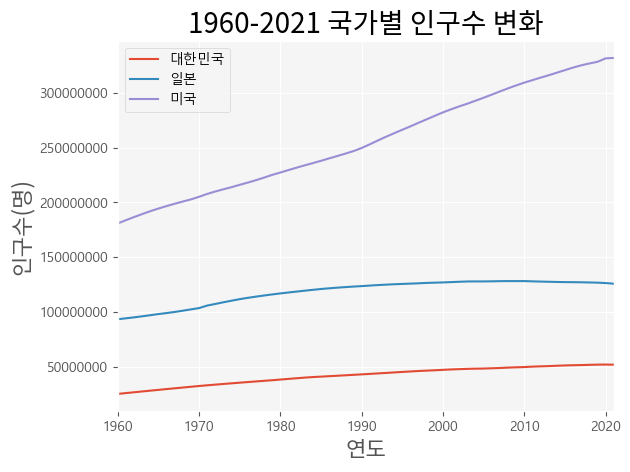

In [129]:
fig, ax = plt.subplots()

ax.plot(trans.index, trans['Korea, Rep.'], label='대한민국')
# ax.plot(trans.index, trans['China'], label='China')
ax.plot(trans.index, trans['Japan'], label='일본')
ax.plot(trans.index, trans['United States'], label='미국')
# ax.plot(trans.index, trans['India'], label='India')

plt.title("1960-2021 국가별 인구수 변화", font=path_noto, fontsize=20)
plt.xlabel("연도", font=path_noto, fontsize=16)
plt.ylabel("인구수(명)", font=path_noto, fontsize=16)
plt.legend()
plt.xlim([1960.0, 2021.0])
plt.ticklabel_format(style='plain')
plt.show()

In [128]:
trans_exp = trans[["Korea, Rep.", "Japan", "United States"]].reset_index()
trans_exp.columns=['연도', '대한민국', '일본', '미국']
# trans_exp.columns.names = ['']
# trans_exp

filepath = Path('./pop_example.csv')
trans_exp.to_csv(filepath, index=False, encoding='utf-8-sig')

<AxesSubplot: title={'center': '월별 운동일수'}, xlabel='월', ylabel='운동일수'>

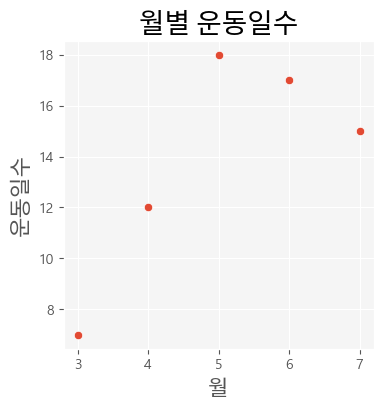

In [156]:
dummy = pd.DataFrame({
    '월': [3, 4, 5, 6, 7],
    '운동횟수': [7, 12, 18, 17, 15]
})

fig = plt.figure(figsize=(4, 4))
plt.title('월별 운동일수', font=path_noto, fontsize=20)
plt.xlabel('월', font=path_noto, fontsize=16)
plt.ylabel('운동일수', font=path_noto, fontsize=16)
sns.scatterplot(data=dummy, x='월', y='운동횟수')

<AxesSubplot: title={'center': '월별 운동일수'}, xlabel='월', ylabel='운동일수'>

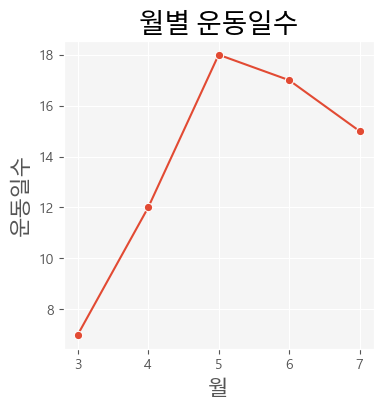

In [157]:
fig = plt.figure(figsize=(4, 4))
plt.title('월별 운동일수', font=path_noto, fontsize=20)
plt.xlabel('월', font=path_noto, fontsize=16)
plt.ylabel('운동일수', font=path_noto, fontsize=16)
sns.lineplot(data=dummy, x='월', y='운동횟수', marker='o')

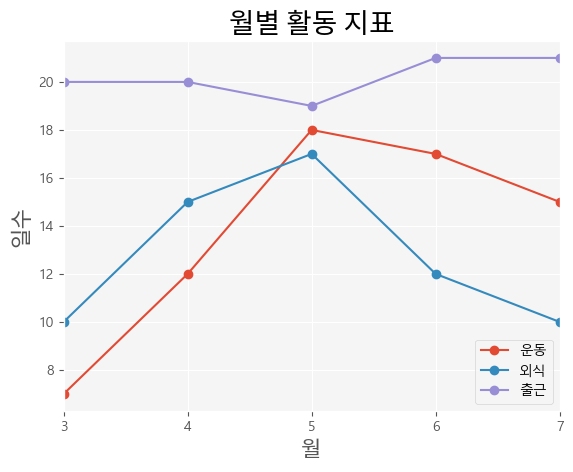

In [171]:
dummy['외식일수'] = [10, 15, 17, 12, 10]
dummy['출근일수'] = [20, 20, 19, 21, 21]

plt.plot(dummy['월'], dummy['운동횟수'], label='운동', marker='o')
plt.plot(dummy['월'], dummy['외식일수'], label='외식', marker='o')
plt.plot(dummy['월'], dummy['출근일수'], label='출근', marker='o')
plt.title("월별 활동 지표", font=path_noto, fontsize=20)
plt.xlabel("월", font=path_noto, fontsize=16)
plt.ylabel('일수', font=path_noto, fontsize=16)
plt.xlim([3.0, 7.0])
plt.xticks(np.arange(min(dummy['월']), max(dummy['월'])+1, 1.0))
plt.legend()

In [ ]:
dum1 = pd.DataFrame({
    '연도': [2000, 2010, 2020],
    '당일': [7, 13, 7],
    '숙박': [5, 2, 1]
})


fig = plt.figure(figsize=(6, 4))
plt.plot(dum1['연도'], dum1['당일'], linewidth=3, marker='o')
plt.plot(dum1['연도'], dum1['숙박'], linewidth=3, marker='o')
plt.xticks(np.arange(min(dum1['연도']), max(dum1['연도'])+1, 10), fontsize=16)
plt.yticks(fontsize=16)

Text(0.5, 0, '월')

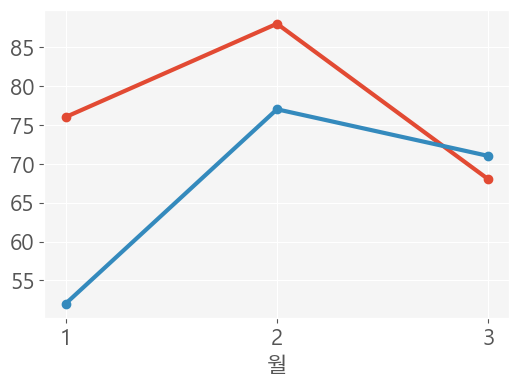

In [189]:
dum2 = pd.DataFrame({
    '월': [1, 2, 3],
    '대여': [76, 88, 68],
    '반납': [52, 77, 71]
})

fig = plt.figure(figsize=(6, 4))
plt.plot(dum2['월'], dum2['대여'], linewidth=3, marker='o')
plt.plot(dum2['월'], dum2['반납'], linewidth=3, marker='o')
plt.xticks(np.arange(min(dum2['월']), max(dum2['월'])+1, 1), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("월", font=path_noto, fontsize=16)

Text(0.5, 0, '날짜')

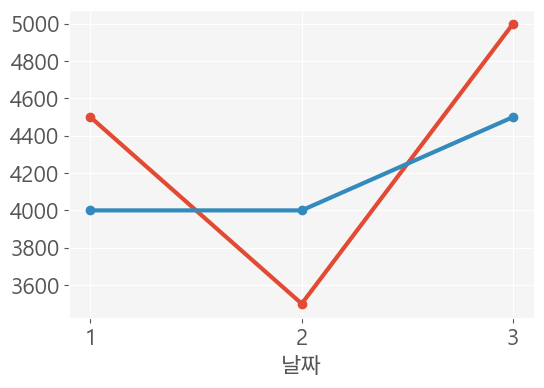

In [191]:
dum3 = pd.DataFrame({
    '날짜': [1, 2, 3],
    '섭취': [4500, 3500, 5000],
    '소모': [4000, 4000, 4500]
})

fig = plt.figure(figsize=(6, 4))
plt.plot(dum3['날짜'], dum3['섭취'], linewidth=3, marker='o')
plt.plot(dum3['날짜'], dum3['소모'], linewidth=3, marker='o')
plt.xticks(np.arange(min(dum3['날짜']), max(dum3['날짜'])+1, 1), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("날짜", font=path_noto, fontsize=16)

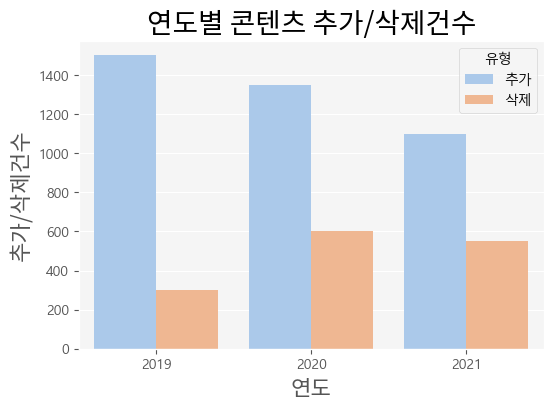

In [232]:
dum4 = pd.DataFrame({
    '연도': [2019, 2020, 2021],
    '추가': [1500, 1350, 1100],
    '삭제': [300, 600, 550]
})

fig = plt.figure(figsize=(6, 4))
# plt.plot(dum4['연도'], dum4['추가'], label='추가')
# plt.plot(dum4['연도'], dum4['삭제'], label='삭제')
tidy = dum4.melt(id_vars='연도').rename(columns=str.title)
sns.barplot(data=tidy, x='연도', y='Value', hue='Variable', palette=colors)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
plt.title("연도별 콘텐츠 추가/삭제건수", font=path_noto, fontsize=20)
plt.xlabel("연도", font=path_noto, fontsize=16)
plt.ylabel("추가/삭제건수", font=path_noto, fontsize=16)

plt.legend(title='유형')

In [216]:
movies = pd.read_csv("../영화 관객수/movies_train.csv")
movies['release_time'] = pd.to_datetime(movies['release_time'])
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


<AxesSubplot: xlabel='release_time', ylabel='dir_prev_bfnum'>

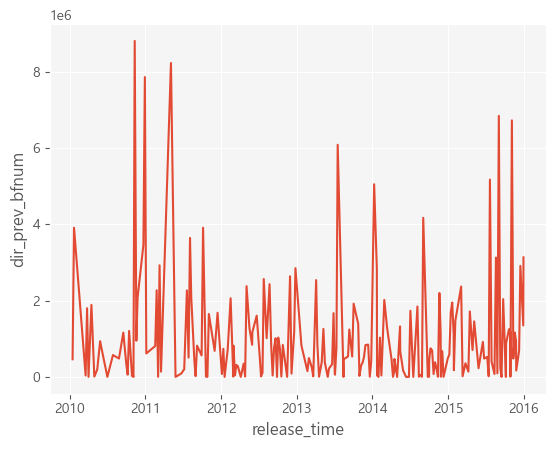

In [220]:
sns.lineplot(data=movies, x='release_time', y='dir_prev_bfnum', ci=None)